#**Investigate Hotel Business Using Data Visualization**

In [1]:
 import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df=pd.read_csv('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.shape

(119390, 29)

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

In [7]:
df.duplicated().sum()

33261

In [8]:
numericals=df.select_dtypes(include=['int64','float64']).columns.tolist()
categoricals=df.select_dtypes(include='object').columns.tolist()

In [9]:
df[numericals].describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [10]:
df[categoricals].describe().T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,October,13877
meal,119390,5,Breakfast,92310
city,118902,177,Kota Denpasar,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Personal,89613
reservation_status,119390,3,Check-Out,75166


# TASK1 : Data Preprocessing

## Handling Missing Value

In [11]:
df1 = df.copy()

In [12]:
missing=df1.isnull().sum().sort_values(ascending=False)
percen_missing=round(df1.isnull().sum().sort_values(ascending = False)/len(df1)*100,3).sort_values(ascending=False)
missing_value = pd.concat([missing,percen_missing], axis=1, keys=['Isnull','Percent'])
missing_value

,Isnull,Percent
company,112593,94.307
agent,16340,13.686
city,488,0.409
children,4,0.003
hotel,0,0.000
is_repeated_guest,0,0.000
total_of_special_requests,0,0.000
required_car_parking_spaces,0,0.000
adr,0,0.000
customer_type,0,0.000


There are 4 features with missing values, the handling of missing values is:
- Company : The 'company' feature has values in codes or IDs from the Hotel. The missing values assumed to indicate that the customers did not orders through theHotel, so they are filled with 0.
- Agent: The 'agent' feature has values in codes or IDs from the Hotel. The missing values assumed to indicate that the customers did not orders through theHotel, so they are filled with 0.
- City: The missing values is 0.409%. It is decided to drop them because they do not significantly affect the results.
- Children: The missing values is 0.003%. It is decided to drop them because they do not significantly affect the results.

In [13]:
#Drop features City and Children with Missing Values
df1 = df1.dropna(subset=['city','children'])
df1['company'].fillna(value=0, inplace = True)
df1['agent'].fillna(value=0, inplace = True)
df1.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Correcting Dtypes

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_weekdays_nights        118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

In [15]:
# Change Type Data 'float64' to 'int64' that have no decimal value
changeto = ['children','agent','company']
for col in changeto:
    df1[col] = df1[col].astype(int)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_weekdays_nights        118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  int32  
 11  babies                          118898 non-null  int64  
 12  meal            

## Replace The Inappropriate Value

In [16]:
df1['meal'].value_counts()

Breakfast     91863
Dinner        14434
No Meal       10638
Undefined      1165
Full Board      798
Name: meal, dtype: int64

In [17]:
df1['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24160
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [18]:
df1['distribution_channel'].value_counts()

TA/TO        97730
Direct       14483
Corporate     6491
GDS            193
Undefined        1
Name: distribution_channel, dtype: int64

There is a value 'Undefined' in the 'meal','market_segment', & 'distribution_channel' feature that has no any clear category. It is assumed that customers did not order Breakfast, Dinner, or Full Board (Breakfast+Dinner) in 'meal', so it will be changed to 'No Meal'. The 'Undefined' in feature 'market_segment' & 'distribution_channel' will be replaced with mode value in that feature.

In [19]:
a = df1['market_segment'].mode()[0]
b = df1['distribution_channel'].mode()[0]

df1['meal'] = df1['meal'].replace('Undefined', 'No Meal')
df1['market_segment'] = df1['market_segment'].replace('Undefined', a)
df1['distribution_channel'] = df1['distribution_channel'].replace('Undefined', b)

In [20]:
df1['meal'].value_counts()

Breakfast     91863
Dinner        14434
No Meal       11803
Full Board      798
Name: meal, dtype: int64

In [21]:
df1['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24160
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [22]:
df1['distribution_channel'].value_counts()

TA/TO        97731
Direct       14483
Corporate     6491
GDS            193
Name: distribution_channel, dtype: int64

## Remove Unnecessary Data

In [23]:
#Remove value of 'adr' that below 0
df1.drop(df1[df1['adr']<0].index, inplace = True)

In [24]:
#Remove unnecessary data with 0 Guest and 0 Stay Days
#Create new feature 'Total_Guest' and 'Total_Stay_Days'
df1['Total_Guest'] = df1['adults'] + df1['children'] + df1['babies']
df1['Total_Stay_Days'] = df1['stays_in_weekdays_nights'] + df1['stays_in_weekdays_nights']
df1.drop(df1[(df1['Total_Guest'] <= 0) & (df1['Total_Stay_Days'] <= 0)].index, inplace = True)
df1.shape

(118833, 31)

#TASK 2

## Monthly Hotel Booking Analysis Based on Hotel Type

In [25]:
df2 = df1.copy()
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'Total_Guest', 'Total_Stay_Days'],
      dtype='object')

In [26]:
#Create aggregate table using group by to count Monthly Hotel Booking Based on Hotel Type
df_agg = df2.groupby (['hotel','arrival_date_month']).agg({'arrival_date_year':'nunique','is_canceled':'count'}).reset_index()
df_agg.columns=['hotel_type','arrival_month','num_of_years','num_of_booking']
df_agg

,hotel_type,arrival_month,num_of_years,num_of_booking
0,City Hotel,April,2,4959
1,City Hotel,August,2,7890
2,City Hotel,December,2,7589
3,City Hotel,February,2,4117
4,City Hotel,January,2,4343
5,City Hotel,July,2,8229
6,City Hotel,June,2,7475
7,City Hotel,March,2,3733
8,City Hotel,May,2,6443
9,City Hotel,November,2,7399


The data for September and October has 3 unique years, unlike the other months. Therefore, it is necessary to normalize the data in order to compare it with other months by calculating the monthly averages.

In [27]:
#create feature monthly average of booking
df_agg['avg_month_booking']=round(df_agg['num_of_booking']/df_agg['num_of_years'])

#sort by month
m = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_agg['arrival_month'] = pd.Categorical(df_agg['arrival_month'], categories=m, ordered=True)
df_agg = df_agg.sort_values(['arrival_month']).reset_index(drop=True)
df_agg

,hotel_type,arrival_month,num_of_years,num_of_booking,avg_month_booking
0,City Hotel,January,2,4343,2172.0
1,Resort Hotel,January,2,2398,1199.0
2,City Hotel,February,2,4117,2058.0
3,Resort Hotel,February,2,2599,1300.0
4,City Hotel,March,2,3733,1866.0
5,Resort Hotel,March,2,2138,1069.0
6,City Hotel,April,2,4959,2480.0
7,Resort Hotel,April,2,3047,1524.0
8,Resort Hotel,May,2,3280,1640.0
9,City Hotel,May,2,6443,3222.0


<function matplotlib.pyplot.show(close=None, block=None)>

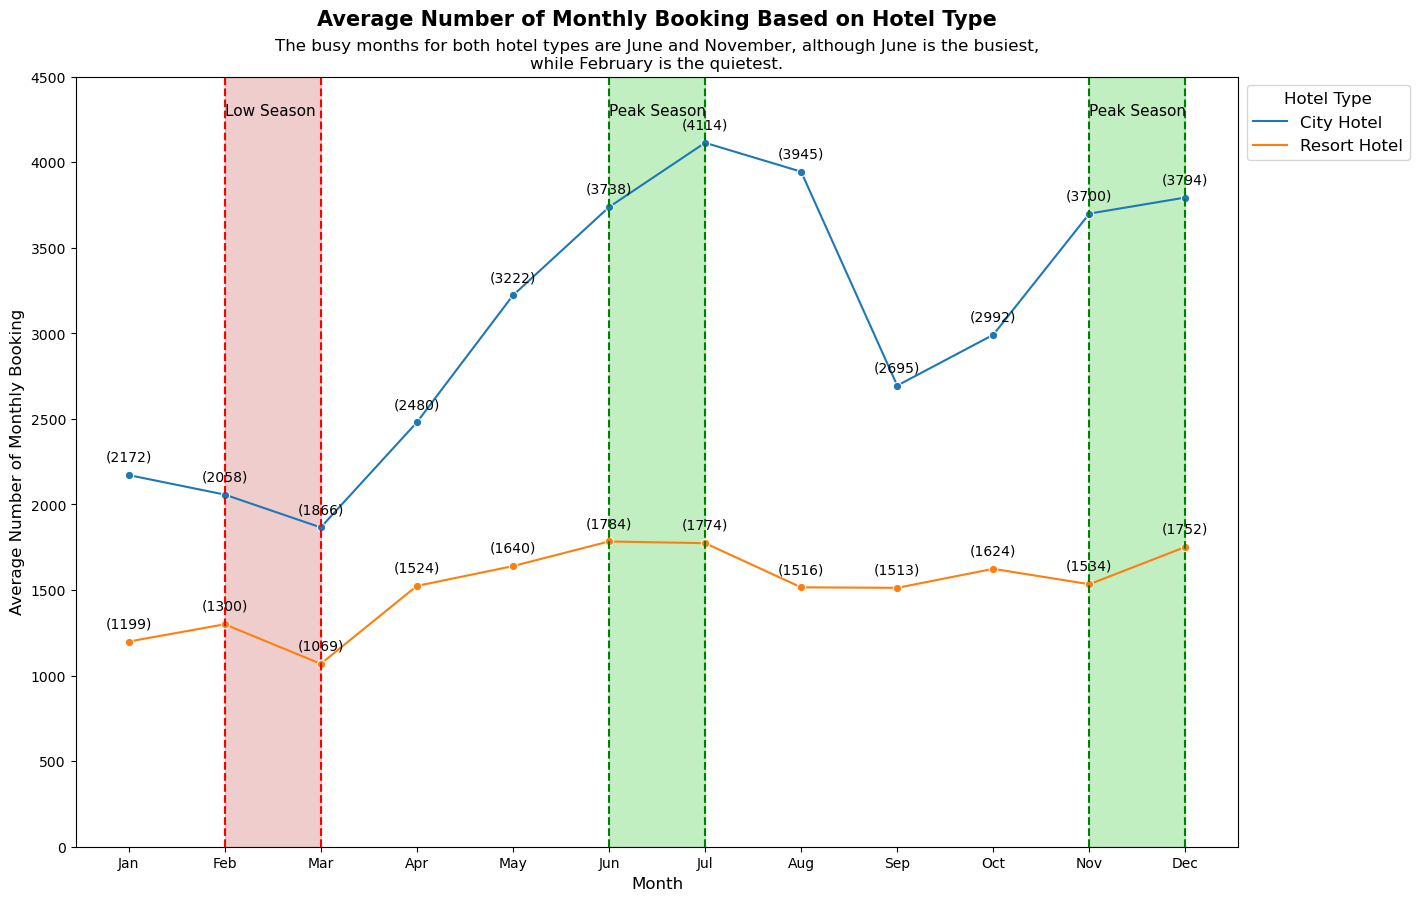

In [28]:
#Visualization
plt.figure(figsize=(15,10))

sns.lineplot(data=df_agg, x='arrival_month',y='avg_month_booking',hue='hotel_type',marker='o')
for i, (x, y) in enumerate(zip(df_agg['arrival_month'], df_agg['avg_month_booking'])):
    plt.annotate(f'({y:.0f})', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

plt.axvline(x=1, color='red', ls = '--')
plt.axvline(x=2, color='red', ls = '--')
plt.stackplot(np.arange(1,3),[[4500]], color = 'indianred', alpha=0.3)
plt.text(x=1, y=4300, s='Low Season', fontsize=11, color='black', va='center')

plt.axvline(x=5, color='green', ls = '--')
plt.axvline(x=6, color='green', ls = '--')
plt.stackplot(np.arange(5,7),[[4500]], color = 'limegreen', alpha=0.3)
plt.text(x=5, y=4300, s='Peak Season', fontsize=11, color='black', va='center')

plt.axvline(x=10, color='green', ls = '--')
plt.axvline(x=11, color='green', ls = '--')
plt.stackplot(np.arange(10,12),[[4500]], color = 'limegreen', alpha=0.3)
plt.text(x=10, y=4300, s='Peak Season', fontsize=11, color='black', va='center')


plt.text(x=5.5, y=4800, s='Average Number of Monthly Booking Based on Hotel Type', fontsize=15, weight='bold', ha='center')
plt.text(x=5.5, y=4550, s='The busy months for both hotel types are June and November, although June is the busiest,\nwhile February is the quietest.',fontsize=12,ha='center')
plt.xlabel('Month', fontsize=12)
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.ylabel('Average Number of Monthly Booking', fontsize=12)
plt.legend(title='Hotel Type', title_fontsize=12, prop={'size':12}, bbox_to_anchor=(1, 1), loc='best')
plt.ylim(0, 4500)

plt.show

- Peak Season: June and November are identified as the peak months for high demand in hotel accommodations for both City and Resort Hotels. This means that these months witness a significant influx of guests, resulting in higher occupancy rates and potentially higher room prices. Factors such as holidays, special events, or favorable weather conditions contribute to the peak season.

- Low Season: February is considered the quietest month with the lowest demand for hotel accommodations for both City and Resort Hotels. During the low season, hotels experience a decrease in bookings, often due to factors like unfavorable weather, fewer holidays, or less popular travel periods. To attract guests and fill their rooms during this period, hotels might offer promotions, discounts, or special packages.

# TASK 3

## Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [29]:
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_Guest,Total_Stay_Days
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0,0,0,Personal,0.0,0,0,Check-Out,2,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0,0,0,Personal,0.0,0,0,Check-Out,2,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,0,0,Personal,75.0,0,0,Check-Out,1,2
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,304,0,0,Personal,75.0,0,0,Check-Out,1,2
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,240,0,0,Personal,98.0,0,1,Check-Out,2,4


Grouping the total duration of days into 4 categories:
- Total stay days <= 7 days = Group 1
- Total stay days days 8-14 days = Group 2
- Total stay days days 15-21 days = Group 3
- Total stay days days > 21 days = Group 4

In [30]:
def group(i):
  if i['Total_Stay_Days'] <= 7:
    group = '1'
  elif i['Total_Stay_Days'] <=14:
    group =  '2'
  elif i['Total_Stay_Days'] <=21:
    group =  '3'
  else:
    group = '4'
  return group


df2['Stay_Days_Group']=df2.apply(lambda i:group(i), axis=1)
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_Guest,Total_Stay_Days,Stay_Days_Group
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0,0,Personal,0.00,0,0,Check-Out,2,0,1
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0,0,Personal,0.00,0,0,Check-Out,2,0,1
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,0,Personal,75.00,0,0,Check-Out,1,2,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,0,Personal,75.00,0,0,Check-Out,1,2,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,0,Personal,98.00,0,1,Check-Out,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,0,Personal,96.14,0,0,Check-Out,2,10,2
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,0,Personal,225.43,0,2,Check-Out,3,10,2
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,0,Personal,157.71,0,4,Check-Out,2,10,2
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,0,Personal,104.40,0,0,Check-Out,2,10,2


In [31]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'Total_Guest', 'Total_Stay_Days',
       'Stay_Days_Group'],
      dtype='object')

In [32]:
#Create aggregate table using group by to count hotel booking cancellation rate per total stay days based on hotel type.
df3 = df2.groupby(['hotel','is_canceled','Stay_Days_Group']).agg({'Total_Guest':'count'}).reset_index()
df3.columns = ['hotel_type','is_canceled','stay_days_group','num_of_booking']

df4 = df2.groupby(['hotel','Stay_Days_Group']).agg({'Total_Guest':'count'}).reset_index()
df4.columns = ['hotel_type','stay_days_group','sum_of_booking']

df_merge = pd.merge(df3, df4, on=['hotel_type','stay_days_group'])
df_merge['cancellation_rate']=round((df_merge['num_of_booking']/df_merge['sum_of_booking'])*100,2)
df_merge

,hotel_type,is_canceled,stay_days_group,num_of_booking,sum_of_booking,cancellation_rate
0,City Hotel,0,1,40027,68736,58.23
1,City Hotel,1,1,28709,68736,41.77
2,City Hotel,0,2,5949,9986,59.57
3,City Hotel,1,2,4037,9986,40.43
4,City Hotel,0,3,158,378,41.80
5,City Hotel,1,3,220,378,58.20
6,City Hotel,0,4,33,139,23.74
7,City Hotel,1,4,106,139,76.26
8,Resort Hotel,0,1,18304,24661,74.22
9,Resort Hotel,1,1,6357,24661,25.78


In [33]:
df_merge = df_merge[df_merge['is_canceled']==1].sort_values('stay_days_group', ascending=True)
df_merge

,hotel_type,is_canceled,stay_days_group,num_of_booking,sum_of_booking,cancellation_rate
1,City Hotel,1,1,28709,68736,41.77
9,Resort Hotel,1,1,6357,24661,25.78
3,City Hotel,1,2,4037,9986,40.43
11,Resort Hotel,1,2,4208,13136,32.03
5,City Hotel,1,3,220,378,58.20
13,Resort Hotel,1,3,389,1537,25.31
7,City Hotel,1,4,106,139,76.26
15,Resort Hotel,1,4,123,260,47.31


<function matplotlib.pyplot.show(close=None, block=None)>

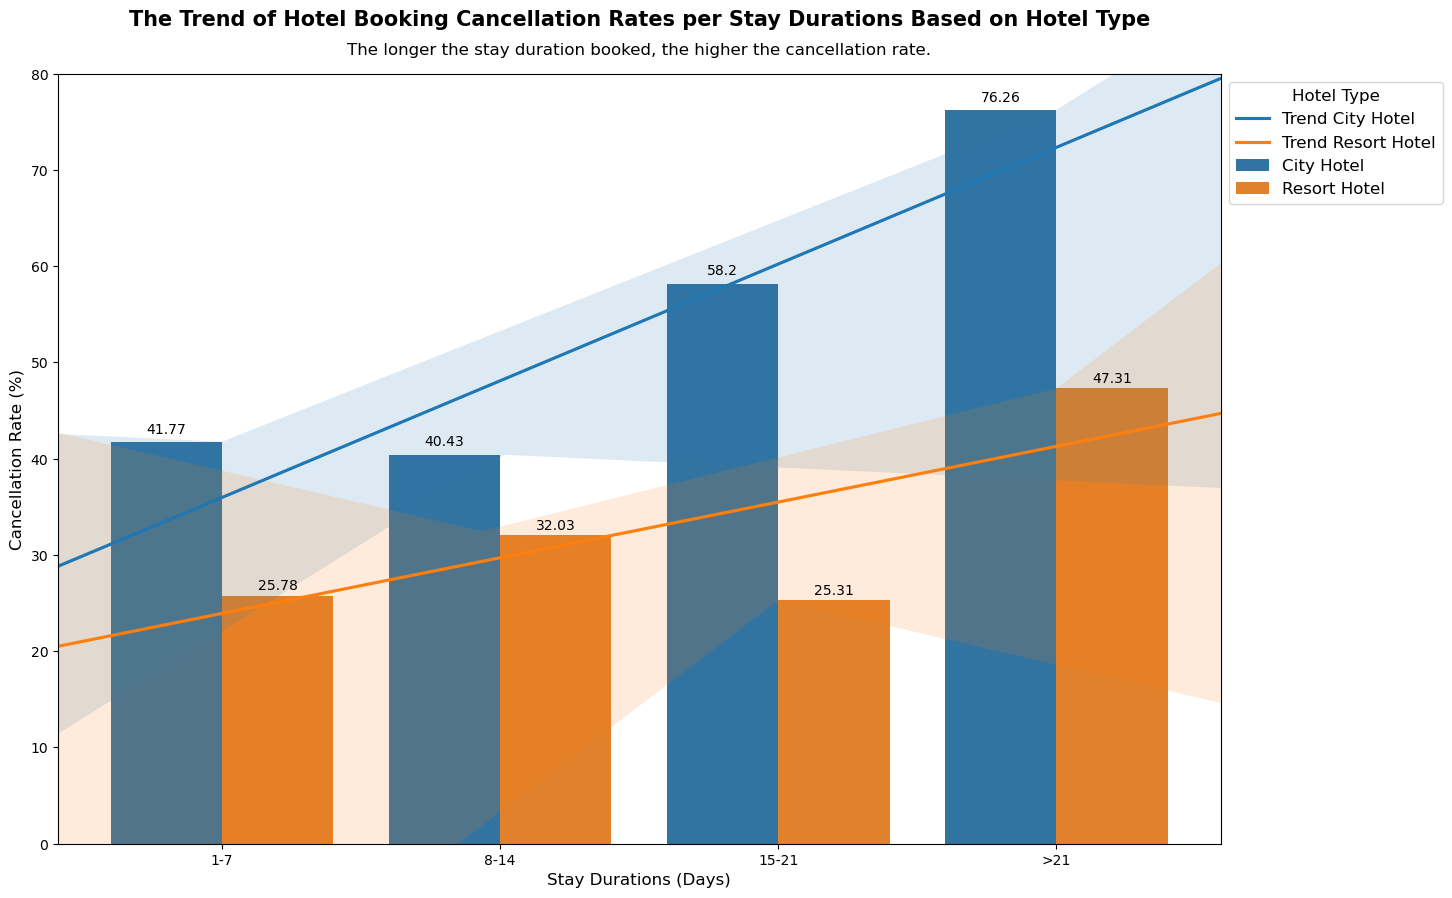

In [34]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data=df_merge, x='stay_days_group',y='cancellation_rate',hue='hotel_type')
sns.regplot(x=np.arange(0,len(df_merge[df_merge['hotel_type']=='City Hotel'])),y='cancellation_rate', data = df_merge[df_merge['hotel_type']=='City Hotel'], scatter=False, truncate=False, label = 'Trend City Hotel')
sns.regplot(x=np.arange(0,len(df_merge[df_merge['hotel_type']=='Resort Hotel'])),y='cancellation_rate', data = df_merge[df_merge['hotel_type']=='Resort Hotel'], scatter=False, truncate=False, label = 'Trend Resort Hotel')

plt.bar_label(ax.containers[0], padding=4)
plt.bar_label(ax.containers[1], padding=2)

plt.text(x=1.5, y=85, s='The Trend of Hotel Booking Cancellation Rates per Stay Durations Based on Hotel Type', fontsize=15, weight='bold', ha='center')
plt.text(x=1.5, y=82, s='The longer the stay duration booked, the higher the cancellation rate.',fontsize=12,ha='center')
plt.xlabel('Stay Durations (Days)', fontsize=12)
plt.xticks(np.arange(4), ['1-7','8-14','15-21','>21'])
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.legend(title='Hotel Type', title_fontsize=12, prop={'size':12}, bbox_to_anchor=(1, 1), loc='best')
plt.ylim(0, 80)

plt.show

- **City Hotel dan Resort** : Both types of hotels, City Hotel as well as Resort, show an increase in cancellation rates as the guests' duration of stay extends. This indicates that the longer guests stay, the higher the likelihood of them canceling their reservations.

- **City Hotel vs. Resort** : The cancellation rate in City Hotel is higher than in Resort. Cancellations in City Hotel reach 76.26% when the duration of stay exceeds 21 days, but it is at its lowest at 40.43% during a stay duration of 8-14 days. On the other hand, Resort has its highest cancellation rate at around 47.31% when the duration of stay also exceeds 21 days, and it is lowest at 25.78% during a stay duration of 15-21 days.

# TASK 4

## Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [35]:
def lead(i):
  if i['lead_time'] <= 30 :
    lead = '1 Month'
  elif i['lead_time'] <= 60 :
    lead = '2 Month'
  elif i['lead_time'] <= 90 :
    lead = '3 Month'
  elif i['lead_time'] <= 120 :
    lead = '4 Month'
  elif i['lead_time'] <= 150 :
    lead = '5 Month'
  elif i['lead_time'] <= 180 :
    lead = '6 Month'
  elif i['lead_time'] <= 210 :
    lead = '7 Month'
  elif i['lead_time'] <= 240 :
    lead = '8 Month'
  elif i['lead_time'] <= 270 :
    lead = '9 Month'
  elif i['lead_time'] <= 300 :
    lead = '10 Month'
  elif i['lead_time'] <= 330 :
    lead = '11 Month'
  elif i['lead_time'] <= 360 :
    lead = '12 Month'
  else:
    lead = '> 12 Month'
  return lead

df2['lead_time_group']=df2.apply(lambda i:lead(i),axis=1)
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_Guest,Total_Stay_Days,Stay_Days_Group,lead_time_group
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0,Personal,0.00,0,0,Check-Out,2,0,1,12 Month
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0,Personal,0.00,0,0,Check-Out,2,0,1,> 12 Month
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0,Personal,75.00,0,0,Check-Out,1,2,1,1 Month
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0,Personal,75.00,0,0,Check-Out,1,2,1,1 Month
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0,Personal,98.00,0,1,Check-Out,2,4,1,1 Month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2019,October,35,30,2,5,2,...,0,Personal,96.14,0,0,Check-Out,2,10,2,1 Month
119386,City Hotel,0,102,2019,October,35,31,2,5,3,...,0,Personal,225.43,0,2,Check-Out,3,10,2,4 Month
119387,City Hotel,0,34,2019,October,35,31,2,5,2,...,0,Personal,157.71,0,4,Check-Out,2,10,2,2 Month
119388,City Hotel,0,109,2019,October,35,31,2,5,2,...,0,Personal,104.40,0,0,Check-Out,2,10,2,4 Month


In [36]:
#Create aggregate table using group by to count hotel booking cancellation rate per total stay days based on hotel type.
df5 = df2.groupby(['hotel','is_canceled','lead_time_group']).agg({'Total_Guest':'count'}).reset_index()
df5.columns = ['hotel_type','is_canceled','lead_time_group','num_of_booking']

df6 = df2.groupby(['hotel','lead_time_group']).agg({'Total_Guest':'count'}).reset_index()
df6.columns = ['hotel_type','lead_time_group','sum_of_booking']

df_lead = pd.merge(df5, df6, on=['hotel_type','lead_time_group'])
df_lead['cancellation_rate']=round((df_lead['num_of_booking']/df_lead['sum_of_booking'])*100,2)
df_lead.head()

,hotel_type,is_canceled,lead_time_group,num_of_booking,sum_of_booking,cancellation_rate
0,City Hotel,0,1 Month,18105,23289,77.74
1,City Hotel,1,1 Month,5184,23289,22.26
2,City Hotel,0,10 Month,660,2519,26.20
3,City Hotel,1,10 Month,1859,2519,73.80
4,City Hotel,0,11 Month,514,2118,24.27


In [37]:
l = ['1 Month','2 Month','3 Month','4 Month','5 Month','6 Month','7 Month','8 Month','9 Month','10 Month','11 Month','12 Month','> 12 Month']
df_lead['lead_time_group']=pd.Categorical(df_lead['lead_time_group'],categories=l, ordered=True)
df_lead = df_lead[df_lead['is_canceled']==1].sort_values('lead_time_group', ascending=True).reset_index(drop=True)
df_lead

,hotel_type,is_canceled,lead_time_group,num_of_booking,sum_of_booking,cancellation_rate
0,City Hotel,1,1 Month,5184,23289,22.26
1,Resort Hotel,1,1 Month,1964,14964,13.12
2,City Hotel,1,2 Month,4608,11886,38.77
3,Resort Hotel,1,2 Month,1564,5065,30.88
4,City Hotel,1,3 Month,3692,8908,41.45
5,Resort Hotel,1,3 Month,1268,3654,34.70
6,Resort Hotel,1,4 Month,1159,2977,38.93
7,City Hotel,1,4 Month,3486,7447,46.81
8,Resort Hotel,1,5 Month,1032,2527,40.84
9,City Hotel,1,5 Month,2542,5612,45.30


<function matplotlib.pyplot.show(close=None, block=None)>

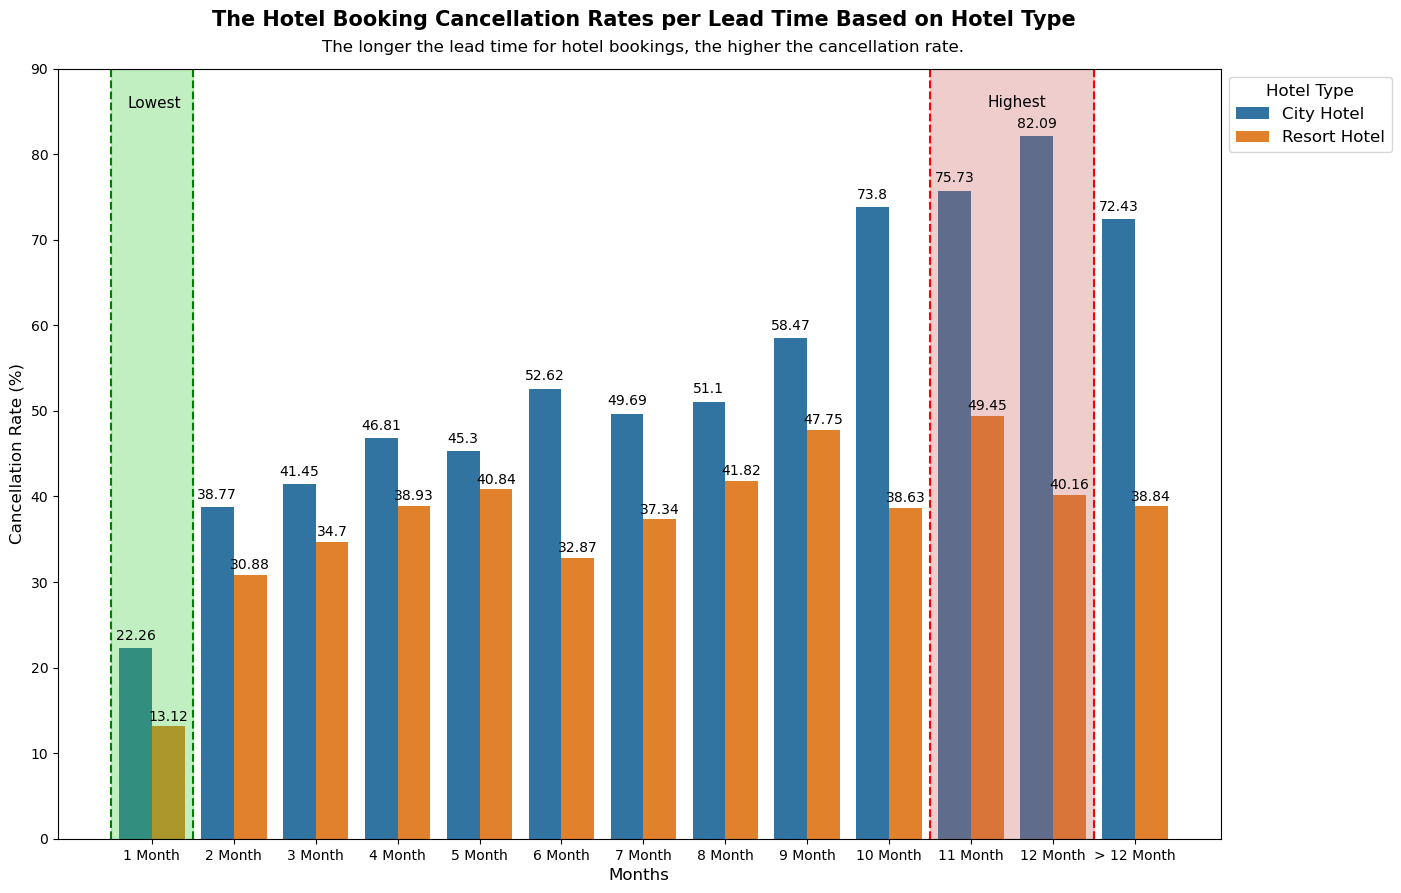

In [38]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data=df_lead, x='lead_time_group',y='cancellation_rate',hue='hotel_type')

plt.bar_label(ax.containers[0], padding=4)
plt.bar_label(ax.containers[1], padding=2)

plt.axvline(x=-0.5, color='green', ls = '--')
plt.axvline(x=0.5, color='green', ls = '--')
plt.stackplot(np.arange(-0.5,1.5),[[90]], color = 'limegreen', alpha=0.3)
plt.text(x=-0.3, y=86, s='Lowest', fontsize=11, color='black', va='center')

plt.axvline(x=9.5, color='red', ls = '--')
plt.axvline(x=11.5, color='red', ls = '--')
plt.stackplot(np.arange(9.5,12),[[90]], color = 'indianred', alpha=0.3)
plt.text(x=10.2, y=86, s='Highest', fontsize=11, color='black', va='center')

plt.text(x=6, y=95, s='The Hotel Booking Cancellation Rates per Lead Time Based on Hotel Type', fontsize=15, weight='bold', ha='center')
plt.text(x=6, y=92, s='The longer the lead time for hotel bookings, the higher the cancellation rate.',fontsize=12,ha='center')
plt.xlabel('Months', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.legend(title='Hotel Type', title_fontsize=12, prop={'size':12}, bbox_to_anchor=(1, 1), loc='best')
plt.ylim(0, 90)

plt.show

- There is a correlation between the lead time for booking and the cancellation rate, especially for city and resort hotels. As the lead time increases, the cancellation rate also tends to rise.
- The lowest cancellation rates are observed at a lead time of 1 month, with city hotels having a cancellation rate of 22.26% and resort hotels at 13.12%.
- The highest cancellation rates are between the lead times of 11 and 12 months. In month 12, city hotels experience the highest cancellation rate of 82.09%, while resort hotels have a peak cancellation rate of 49.45% in month 11.